<a id="index"></a>
# Index

Initializing
- [Defining the company ticker](#ticker)
- [Python Imports](#imports)
- [Remove previous files](#remove_previous_files)

Importing Data
- [Importing data from Financial Modeling Prep](#fmp_import)
- [Exploring the downloaded data](#fmp_explore)
- [Transforming the downloaded data to a dataframe](#fmp_to_df)


Processing Data
- [[fundamentals_df] Creating a custom Dataframe from the downloaded Data](#fundamentals_df)
    - [Variables used by all dataframes](#fundamentals_variables)
    - [[fundamentals_financials_df] Financial Statements df](#fundamentals_financials_df)
    - [[fundamentals_metrics_df] Metrics df](#fundamentals_metrics_df)
    - [[fundamentals_ratios_df ] Ratios df](#fundamentals_ratios_df)


- [[graph_df] Creating a new separate dataframe for the graphs](#graph_df)
    - [[Graph] Balance Sheet total USD](#bs_total)
    - [[Graph] Balance Sheet percentage amount](#bs_percentage)
    - [[Graph] Income Statement USD amount](#is_total)
    - [[Graph] Income Statement percentage amount graph](#is_percentage)
    - [[Graph] Equity distribution, reinvestment, and debt payment graph](#equity_uses)
    - [[Graph] Cash Flow Statement](#CF_graph)


- [Formating financial statements for the PDF Table Output](#pdf_table)
    - [[table_is_df] Income Statement Dataframe ](#table_is_df)
    - [[table_cs_is_df] Common Size Income Statement Dataframe ](#table_cs_is_df)
    - [[table_bs_df] Balance Sheet Dataframe ](#table_bs_df)
    - [[table_cs_bs_df] Common Size Balance Sheet Dataframe ](#table_cs_bs_df)
    - [[table_cf_df] Cash Flow Statement Dataframe ](#table_cf_df)
    - [[table_metrics_df] Metrics Dataframe ](#table_metrics_df)


Outputs
- [Exporting as a PDF file](#export_pdf)
    - [Formating data for the PDF](#formating_pdf)
    - [Defining Classes ](#defining_classes_pdf)
    - [Instantiation of Class  ](#class_instantiation_pdf)
    - [Page 1: Company Description ](#page1_pdf)
    - [Page 2: Company Metrics ](#page2_pdf)
    - [Page 3: Financial Statements ](#page3_pdf)
    - [Page 4: Financial Statement Graphs ](#page4_pdf)
    - [Page 5: Common Size Financial Statement Graphs](#page5_pdf)
    - [Save output as PDF ](#save_output_pdf)

To Do's:
- Export to excel

In [ ]:
# Linter Code:

# Load Once
#%load_ext pycodestyle_magic

# Load where linting
#%%pycodestyle

# Automatic Code formater
# pip3 install nb_black
# %load_ext nb_black

<a id="ticker"></a>
### Defining the company ticker [*](#index)

In [9]:
# Define the company ticker
# jupyter nbconvert --to script notebook.ipynb
company = "SIE.DE"
print(company)

SIE.DE


<a id="imports"></a>
### Python Imports [*](#index)

In [10]:
# Python Imports
import os
import requests
import pandas as pd
import plotly.graph_objects as go
import dataframe_image as dfi
import datetime as dt
from fpdf import FPDF
from PIL import Image

# Display pandas dataframes in full form
pd.set_option("display.max_rows", None, "display.max_columns", None)


<a id="remove_previous_files"></a>
### Remove previous files [*](#index)

In [11]:
# Remove previous files
# To ensure report does not contain files from another company

paths = ("images/output/bs.png",
         "images/output/cs_bs.png",
         "images/output/is.png",
         "images/output/cs_is.png",
         "images/output/equity_uses.png",
         "images/output/cash_flow.png",
         "images/output/cs_is_table.png",
         "images/output/is_table.png",
         "images/output/bs_table.png",
         "images/output/cs_bs_table.png",
         "images/output/cf_table.png",
         "images/output/main_metrics_table.png",
         "images/output/company_image.png")

for path in paths:
    if os.path.exists(path):
        print(path+":File exists")
        os.remove(path)
        print(path+":Removed Successfuly")
    else:
        print(path+" : File does not exist")


images/output/bs.png : File does not exist
images/output/cs_bs.png : File does not exist
images/output/is.png : File does not exist
images/output/cs_is.png : File does not exist
images/output/equity_uses.png : File does not exist
images/output/cash_flow.png : File does not exist
images/output/cs_is_table.png : File does not exist
images/output/is_table.png : File does not exist
images/output/bs_table.png : File does not exist
images/output/cs_bs_table.png : File does not exist
images/output/cf_table.png : File does not exist
images/output/main_metrics_table.png : File does not exist
images/output/company_image.png:File exists
images/output/company_image.png:Removed Successfuly


<a id="fmp_import"></a>
### Importing data from Financial Modeling Prep [*](#index)

In [12]:
# Importing data from Financial Modeling Prep

# Data provided by Financial Modeling Prep
# https://financialmodelingprep.com/developer/docs/

# FMP API Key
# api = os.environ.get("token_finmodelprep")
api = os.environ.get("token_finmodelprep2")
# api = os.environ.get("token_finmodelprep3")

www = 'https://financialmodelingprep.com/api/v3'
is_www = '/income-statement/'
bs_www = '/balance-sheet-statement/'
cf_www = '/cash-flow-statement/'
r_www = '/ratios/'
km_www = '/key-metrics/'
p_www = '/profile/'
rtg_www = '/rating/'
es_www = '/earnings-surprises/'

# Data to Import
IS = requests.get(f'{www}{is_www}{company}?apikey={api}').json()
BS = requests.get(f'{www}{bs_www}{company}?apikey={api}').json()
CF = requests.get(f'{www}{cf_www}{company}?apikey={api}').json()
Ratios = requests.get(f'{www}{r_www}{company}?apikey={api}').json()
Metrics = requests.get(f'{www}{km_www}{company}?apikey={api}').json()
Profile = requests.get(f'{www}{p_www}{company}?apikey={api}').json()
Raiting = requests.get(f'{www}{rtg_www}{company}?apikey={api}').json()
Surprises = requests.get(f'{www}{es_www}{company}?apikey={api}').json()

# Download Company Image

# Link for the company image
imageurl = Profile[0]['image']

# Save the company image
r = requests.get(str(imageurl))
with open("images/output/company_image.png", "wb") as f:
    f.write(r.content)

# To get a list of all available tickers use the following:
#symbol = requests.g et(f'{website}/stock/list?apikey={api}').json()


<a id="fmp_explore"></a>
### Exploring the Data [*](#index)

In [13]:
# Exploring the Data:

# Data is currently stored as a list:
# type(<variable_name>)  # To check

# Company Data variable:
#Profile
#company_description = Profile[0]['description']
#company_description

# Financial Statments variable:
#BS
#CF
#IS

# Key Performance Indicators:
#Ratios
#Metrics

# Other Metrics:
#Surprises

<a id="fmp_to_df"></a>
### Transforming the downloaded data to a dataframe[*](#index)

In [14]:
# Exploring the downloaded information

is_df = pd.DataFrame(IS)
bs_df = pd.DataFrame(BS)
cf_df = pd.DataFrame(CF)
ratios_df = pd.DataFrame(Ratios)
metrics_df = pd.DataFrame(Metrics)
profile_df = pd.DataFrame(Profile)
raiting_df = pd.DataFrame(Raiting)
surprises_df = pd.DataFrame(Surprises)

# Used for graphs and PDF output
company_name = profile_df.at[0, 'companyName']

# Uncomment to explore information:
#is_df.head()
#bs_df.head()
#cf_df.head()
#ratios_df.head()
#metrics_df.head()
#profile_df.head()
#raiting_df.head()
#surprises_df.head()
#symbol_df.head()


#ratios_df[['date','priceEarningsRatio']].plot()


In [15]:
# Extracting variable information we will use later
company_symbol = profile_df.at[0,'symbol']
company_name = profile_df.at[0,'companyName']
company_description = Profile[0]['description']
company_currency = Profile[0]['currency']
company_currency


'EUR'

<a id="fundamentals_df"></a>
### [ fundamentals_df ] Creating a custom Dataframe from the downloaded data [*](#index)

Data from Financial Modeling Prep API is not always complete. We must account for incomplete or missing data:
- We pass each imported data variable through an IF statement to check if information was available.
- If information was retreived, the dataframe is created with the data.
- If no information was found, the dataframe produces "99" as an error value.
- Each imported variable is passed independently and then concatenated into a single dataframe.


<a id="fundamentals_variables"></a>
#### Variables used by all dataframes [*](#index)

In [16]:
# Variables used by all dataframes:

millions = 1_000_000
# To divide raw data by 1 million to make it easier to read.

financials = {}
# Used as for loop output

dates = [2020, 2019, 2018, 2017, 2016]
# Keep in descending order to match data

isempty_fs = is_df.empty or bs_df.empty or cf_df.empty
# To check data for fundamentals_financials_df

isempty_metrics = metrics_df.empty
# To check data for fundamentals_metrics_df

isempty_ratios = ratios_df.empty
# To check data for fundamentals_metrics_df


<a id="fundamentals_financials_df"></a>
#### [ fundamentals_financials_df ]  Financial Statements df [*](#index)

In [17]:
# fundamentals_financials_df

if isempty_fs is True:
    print("Dataframe is empty")

    for item in range(5):  # Try Len(is_df) alternative
        
        financials[dates[item]] = {}

        # Income Statement Get
        financials[dates[item]]['WA ShsOut'] = 99
        financials[dates[item]]['WA ShsOutDil'] = 99
        financials[dates[item]]['Revenue'] = 99
        financials[dates[item]]['Gross Profit'] = 99
        financials[dates[item]]['R&D Expenses'] = 99
        financials[dates[item]]['Op Expenses'] = 99
        financials[dates[item]]['Op Income'] = 99
        financials[dates[item]]['Net Income'] = 99
        financials[dates[item]]['EPS'] = 99

        # Balance Sheet Get
        financials[dates[item]]['Cash'] = 99
        financials[dates[item]]['Inventory'] = 99
        financials[dates[item]]['Cur Assets'] = 99
        financials[dates[item]]['LT Assets'] = 99
        financials[dates[item]]['GW_&_IntAssets'] = 99
        financials[dates[item]]['Total Assets'] = 99
        financials[dates[item]]['Cur Liab'] = 99
        financials[dates[item]]['LT Debt'] = 99
        financials[dates[item]]['LT Liab'] = 99
        financials[dates[item]]['Total Liab'] = 99
        financials[dates[item]]['SH Equity'] = 99

        # Cash Flow Statement
        financials[dates[item]]['CF Operations'] = 99
        financials[dates[item]]['CF Investing'] = 99
        financials[dates[item]]['CF Financing'] = 99
        financials[dates[item]]['CAPEX'] = 99
        financials[dates[item]]['FCF'] = 99
        financials[dates[item]]['Dividends Paid'] = 99
        financials[dates[item]]['cashAtBeginningOfPeriod'] = 99
        financials[dates[item]]['cashAtEndOfPeriod'] = 99

else:
    print("Dataframe is not empty")

    for item in range(5):
        
        financials[dates[item]] = {}

        # Income Statement Get
        financials[dates[item]]['WA ShsOut'] = IS[item]['weightedAverageShsOut'] / millions
        financials[dates[item]]['WA ShsOutDil'] = IS[item]['weightedAverageShsOutDil'] / millions
        financials[dates[item]]['Revenue'] = IS[item]['revenue'] / millions
        financials[dates[item]]['Gross Profit'] = IS[item]['grossProfit'] / millions
        financials[dates[item]]['R&D Expenses'] = IS[item]['researchAndDevelopmentExpenses'] / millions
        financials[dates[item]]['Op Expenses'] = IS[item]['operatingExpenses'] / millions
        financials[dates[item]]['Op Income'] = IS[item]['operatingIncome'] / millions
        financials[dates[item]]['Net Income'] = IS[item]['netIncome'] / millions
        financials[dates[item]]['EPS'] = IS[item]['eps']
        financials[dates[item]]['Interest Expense'] = IS[item]['interestExpense'] / millions


        # Balance Sheet Get
        financials[dates[item]]['Cash'] = BS[item]['cashAndShortTermInvestments'] / millions
        financials[dates[item]]['Cur Assets'] = BS[item]['totalCurrentAssets'] / millions
        financials[dates[item]]['LT Assets'] = BS[item]['totalNonCurrentAssets'] / millions
        financials[dates[item]]['GW_&_IntAssets'] = BS[item]['goodwillAndIntangibleAssets'] / millions
        financials[dates[item]]['Total Assets'] = BS[item]['totalAssets'] / millions
        financials[dates[item]]['Cur Liab'] = BS[item]['totalCurrentLiabilities'] / millions
        financials[dates[item]]['LT Liab'] = BS[item]['totalNonCurrentLiabilities'] / millions
        financials[dates[item]]['Total Liab'] = BS[item]['totalLiabilities'] / millions
        financials[dates[item]]['SH Equity'] = BS[item]['totalStockholdersEquity'] / millions

        # Cash Flow Statement
        financials[dates[item]]['CF Operations'] = CF[item]['netCashProvidedByOperatingActivities'] / millions
        financials[dates[item]]['CF Investing'] = CF[item]['netCashUsedForInvestingActivites'] / millions
        financials[dates[item]]['CF Financing'] = CF[item]['netCashUsedProvidedByFinancingActivities'] / millions
        financials[dates[item]]['CAPEX'] = CF[item]['capitalExpenditure'] / millions
        financials[dates[item]]['FCF'] = CF[item]['freeCashFlow'] / millions
        financials[dates[item]]['Dividends Paid'] = CF[item]['dividendsPaid'] / millions
        financials[dates[item]]['cashAtBeginningOfPeriod'] = CF[item]['cashAtBeginningOfPeriod'] / millions
        financials[dates[item]]['cashAtEndOfPeriod'] = CF[item]['cashAtEndOfPeriod'] / millions

# Transform the output dictionary into a Pandas Dataframe:
# Orientation can be "index" or "columns".
fundamentals_financials_df = pd.DataFrame.from_dict(financials, orient='index')
fundamentals_financials_df.index.name = 'Date'

fundamentals_financials_df

Dataframe is not empty


,WA ShsOut,WA ShsOutDil,Revenue,Gross Profit,R&D Expenses,Op Expenses,Op Income,Net Income,EPS,Interest Expense,Cash,Cur Assets,LT Assets,GW_&_IntAssets,Total Assets,Cur Liab,LT Liab,Total Liab,SH Equity,CF Operations,CF Investing,CF Financing,CAPEX,FCF,Dividends Paid,cashAtBeginningOfPeriod,cashAtEndOfPeriod
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020,806.335,817.364,57139.0,20186.0,4601.0,15632.0,4554.0,4030.0,5.00,815.0,16721.0,52968.0,70928.0,25288.0,123897.0,34117.0,49957.0,84074.0,36390.0,8862.0,-5184.0,3172.0,-1554.0,7308.0,-3174.0,12391.0,14041.0
2019,807.273,818.309,86849.0,25927.0,5670.0,19235.0,6692.0,5174.0,6.41,1129.0,14391.0,70370.0,79878.0,39960.0,150248.0,50723.0,48542.0,99265.0,48125.0,8456.0,-5011.0,-2277.0,-2610.0,5846.0,-3060.0,11066.0,12391.0
2018,815.063,828.316,83044.0,24863.0,5558.0,18951.0,5912.0,5807.0,7.12,1089.0,13551.0,64570.0,74345.0,38476.0,138915.0,47874.0,42994.0,90868.0,45474.0,8425.0,-3774.0,-1946.0,-2602.0,5823.0,-3011.0,8389.0,11066.0
2017,812.180,829.164,83049.0,25028.0,5164.0,17685.0,7343.0,6046.0,7.44,1051.0,10766.0,58429.0,75375.0,38834.0,133804.0,43394.0,45883.0,89277.0,43089.0,7176.0,-7457.0,-1560.0,-2406.0,4770.0,-2914.0,10618.0,8375.0
2016,808.686,819.914,79644.0,23818.0,4732.0,16677.0,7141.0,5450.0,6.74,989.0,13029.0,55329.0,70388.0,31901.0,125717.0,42916.0,47985.0,90901.0,34211.0,7611.0,-4144.0,-2710.0,-2135.0,5476.0,-2827.0,9958.0,10604.0


<a id="fundamentals_metrics_df"></a>
#### [ fundamentals_metrics_df ]  Metrics df [*](#index)

In [18]:
# fundamentals_metrics_df

if isempty_metrics is True:
    print("Dataframe is empty")

    for item in range(5):
        
        financials[dates[item]] = {}

        # Key Metrics Get
        financials[dates[item]]['Mkt Cap'] = 99
        financials[dates[item]]['Debt to Assets'] = 99
        financials[dates[item]]['Debt to Equity'] = 99
        financials[dates[item]]['Revenue per Share'] = 99
        financials[dates[item]]['Net Income per Share'] = 99

else:
    print("Dataframe is not empty")

    for item in range(5):
        
        financials[dates[item]] = {}

        # Key Metrics Get
        financials[dates[item]]['Mkt Cap'] = Metrics[item]['marketCap'] / millions
        financials[dates[item]]['Debt to Assets'] = Metrics[item]['debtToAssets']
        financials[dates[item]]['Debt to Equity'] = Metrics[item]['debtToEquity']
        financials[dates[item]]['Revenue per Share'] = Metrics[item]['revenuePerShare']
        financials[dates[item]]['Net Income per Share'] = Metrics[item]['netIncomePerShare']


# Transform the output dictionary into a Pandas Dataframe:
# Orientation can be "index" or "columns"
fundamentals_metrics_df = pd.DataFrame.from_dict(financials, orient='index')
fundamentals_metrics_df.index.name = 'Date'

fundamentals_metrics_df

Dataframe is not empty


,Mkt Cap,Debt to Assets,Debt to Equity,Revenue per Share,Net Income per Share
Date,,,,,
2020,81197.932081,0.678580,1.044380,70.862607,4.997923
2019,84489.195409,0.660674,0.631979,107.583184,6.409232
2018,81620.408005,0.654127,0.596385,101.886603,7.124603
2017,99492.050000,0.667222,0.621435,102.254426,7.444163
2016,83739.437726,0.723061,0.723773,98.485692,6.739328


<a id="fundamentals_ratios_df"></a>
#### [ fundamentals_ratios_df ]  Ratios df [*](#index)

In [19]:
# fundamentals_ratios_df

if isempty_ratios is True:
    print("Dataframe is empty")

    for item in range(5):
        
        financials[dates[item]] = {}

        # Ratios
        financials[dates[item]]['Gross Profit Margin'] = 99
        financials[dates[item]]['Op Margin'] = 99
        financials[dates[item]]['Int Coverage'] = 99
        financials[dates[item]]['Net Profit Margin'] = 99
        financials[dates[item]]['Dividend Yield'] = 99
        financials[dates[item]]['Current Ratio'] = 99
        financials[dates[item]]['Operating Cycle'] = 99
        financials[dates[item]]['Days of AP Outstanding'] = 99
        financials[dates[item]]['Cash Conversion Cycle'] = 99
        financials[dates[item]]['ROA'] = 99
        financials[dates[item]]['ROE'] = 99
        financials[dates[item]]['ROCE'] = 99
        financials[dates[item]]['PE'] = 99
        financials[dates[item]]['PS'] = 99
        financials[dates[item]]['PB'] = 99
        financials[dates[item]]['PCF'] = 99
        financials[dates[item]]['PEG'] = 99

else:
    print("Dataframe is not empty")

    for item in range(5):
        
        financials[dates[item]] = {}

        # Ratios
        financials[dates[item]]['Gross Profit Margin'] = Ratios[item]['grossProfitMargin']
        financials[dates[item]]['Op Margin'] = Ratios[item]['operatingProfitMargin']
        financials[dates[item]]['Int Coverage'] = Ratios[item]['interestCoverage']
        financials[dates[item]]['Net Profit Margin'] = Ratios[item]['netProfitMargin']
        financials[dates[item]]['Dividend Yield'] = Ratios[item]['dividendYield']
        financials[dates[item]]['Current Ratio'] = Ratios[item]['currentRatio']
        financials[dates[item]]['Operating Cycle'] = Ratios[item]['operatingCycle']
        financials[dates[item]]['Days of AP Outstanding'] = Ratios[item]['daysOfPayablesOutstanding']
        financials[dates[item]]['Cash Conversion Cycle'] = Ratios[item]['cashConversionCycle']
        financials[dates[item]]['ROA'] = Ratios[item]['returnOnAssets']
        financials[dates[item]]['ROE'] = Ratios[item]['returnOnEquity']
        financials[dates[item]]['ROCE'] = Ratios[item]['returnOnCapitalEmployed']
        financials[dates[item]]['PE'] = Ratios[item]['priceEarningsRatio']
        financials[dates[item]]['PS'] = Ratios[item]['priceToSalesRatio']
        financials[dates[item]]['PB'] = Ratios[item]['priceToBookRatio']
        financials[dates[item]]['PCF'] = Ratios[item]['priceToFreeCashFlowsRatio']
        financials[dates[item]]['PEG'] = Ratios[item]['priceEarningsToGrowthRatio']
        financials[dates[item]]['EaringsYield'] = 1 / Ratios[item]['priceEarningsRatio']


# Transform the output dictionary into a Pandas Dataframe:
# Orientation can be "index" or "columns".
fundamentals_ratios_df = pd.DataFrame.from_dict(financials, orient='index')
fundamentals_ratios_df.index.name = 'Date'

fundamentals_ratios_df

Dataframe is not empty


,Gross Profit Margin,Op Margin,Int Coverage,Net Profit Margin,Dividend Yield,Current Ratio,Operating Cycle,Days of AP Outstanding,Cash Conversion Cycle,ROA,ROE,ROCE,PE,PS,PB,PCF,PEG,EaringsYield
Date,,,,,,,,,,,,,,,,,,
2020,0.353279,0.079700,5.587730,0.070530,0.039090,1.552540,71.058101,77.764863,-6.706763,0.032527,0.110745,0.050724,20.148370,1.421060,2.231325,11.110828,-0.915965,0.049632
2019,0.298530,0.077053,5.927369,0.059575,0.036218,1.387339,83.194741,68.354371,14.840370,0.034436,0.107512,0.067239,16.329570,0.972829,1.755620,14.452480,-1.637557,0.061239
2018,0.299396,0.071191,5.428834,0.069927,0.036890,1.348749,82.314931,67.227102,15.087829,0.041803,0.127699,0.064938,14.055521,0.982857,1.794881,14.016900,-3.267909,0.071146
2017,0.301364,0.088418,6.986679,0.072800,0.029289,1.346476,139.140484,61.367005,77.773479,0.045185,0.140314,0.081219,16.455847,1.197992,2.308990,20.857872,1.584463,0.060769
2016,0.299056,0.089661,7.220425,0.068430,0.033759,1.289239,131.253806,52.619210,78.634597,0.043351,0.159305,0.086243,15.365034,1.051422,2.447734,15.292081,-0.646795,0.065083


<a id="graph_df"></a>
### [graph_df] Creating a new separate dataframe for the graphs [*](#index)

In [20]:
# Creating a Separate New Dataframe for the Graphs: graph_df
# This way we can modify it without affecting the original data

# opy fundamentals_financials_df
graph_df = fundamentals_financials_df.copy(deep=True)
graph_df.sort_index(ascending=True, inplace=True)

# Get the dates as values inside the dataframe instead of as the index
graph_df.reset_index(inplace=True)
print("Original date data type: "+str(graph_df['Date'].dtypes))

# Turn the Date from an integer to a string format.
# Used for bar graphs to have each year as a discrete category.
graph_df['Date'] = graph_df['Date'].astype(str)
print("Modified date data type: "+str(graph_df['Date'].dtypes))

# Ratios are provided in one of the dataframes
# Sometimes some ratios are not included, but they can be calculated:
# We use the calculated ratios to be minimize errors. 

# Balance sheet graph variables
graph_df['tot_liability_perc'] = round(((graph_df['Total Liab']/graph_df['Total Assets'])*100), 0)
graph_df['tot_intang_equity_perc'] = round(((graph_df['GW_&_IntAssets']/graph_df['Total Assets'])*100), 0)
graph_df['tot_equity_perc'] = round(((graph_df['SH Equity']/graph_df['Total Assets'])*100), 0)

# Income statement graph variables
graph_df['Revenue_perc'] = round(((graph_df['Revenue']/graph_df['Revenue'])*100), 0)
graph_df['Net_income_perc'] = round(((graph_df['Net Income']/graph_df['Revenue'])*100), 0)
graph_df['FCF_perc'] = round(((graph_df['FCF']/graph_df['Revenue'])*100), 0)
graph_df['Int_exp_perc'] = round(((graph_df['Interest Expense']/graph_df['Revenue'])*100), 0)


# Book value growth
graph_df['Book_Value'] = (graph_df['SH Equity']-graph_df['GW_&_IntAssets'])
graph_df['LY_Book_Value'] = graph_df['Book_Value'].shift(1)
graph_df['LY_Equity'] = graph_df['SH Equity'].shift(1)

# Display dataframe
graph_df

Original date data type: int64
Modified date data type: object


,Date,WA ShsOut,WA ShsOutDil,Revenue,Gross Profit,R&D Expenses,Op Expenses,Op Income,Net Income,EPS,Interest Expense,Cash,Cur Assets,LT Assets,GW_&_IntAssets,Total Assets,Cur Liab,LT Liab,Total Liab,SH Equity,CF Operations,CF Investing,CF Financing,CAPEX,FCF,Dividends Paid,cashAtBeginningOfPeriod,cashAtEndOfPeriod,tot_liability_perc,tot_intang_equity_perc,tot_equity_perc,Revenue_perc,Net_income_perc,FCF_perc,Int_exp_perc,Book_Value,LY_Book_Value,LY_Equity
0,2016,808.686,819.914,79644.0,23818.0,4732.0,16677.0,7141.0,5450.0,6.74,989.0,13029.0,55329.0,70388.0,31901.0,125717.0,42916.0,47985.0,90901.0,34211.0,7611.0,-4144.0,-2710.0,-2135.0,5476.0,-2827.0,9958.0,10604.0,72.0,25.0,27.0,100.0,7.0,7.0,1.0,2310.0,NaN,NaN
1,2017,812.180,829.164,83049.0,25028.0,5164.0,17685.0,7343.0,6046.0,7.44,1051.0,10766.0,58429.0,75375.0,38834.0,133804.0,43394.0,45883.0,89277.0,43089.0,7176.0,-7457.0,-1560.0,-2406.0,4770.0,-2914.0,10618.0,8375.0,67.0,29.0,32.0,100.0,7.0,6.0,1.0,4255.0,2310.0,34211.0
2,2018,815.063,828.316,83044.0,24863.0,5558.0,18951.0,5912.0,5807.0,7.12,1089.0,13551.0,64570.0,74345.0,38476.0,138915.0,47874.0,42994.0,90868.0,45474.0,8425.0,-3774.0,-1946.0,-2602.0,5823.0,-3011.0,8389.0,11066.0,65.0,28.0,33.0,100.0,7.0,7.0,1.0,6998.0,4255.0,43089.0
3,2019,807.273,818.309,86849.0,25927.0,5670.0,19235.0,6692.0,5174.0,6.41,1129.0,14391.0,70370.0,79878.0,39960.0,150248.0,50723.0,48542.0,99265.0,48125.0,8456.0,-5011.0,-2277.0,-2610.0,5846.0,-3060.0,11066.0,12391.0,66.0,27.0,32.0,100.0,6.0,7.0,1.0,8165.0,6998.0,45474.0
4,2020,806.335,817.364,57139.0,20186.0,4601.0,15632.0,4554.0,4030.0,5.00,815.0,16721.0,52968.0,70928.0,25288.0,123897.0,34117.0,49957.0,84074.0,36390.0,8862.0,-5184.0,3172.0,-1554.0,7308.0,-3174.0,12391.0,14041.0,68.0,20.0,29.0,100.0,7.0,13.0,1.0,11102.0,8165.0,48125.0


<a id="bs_total"></a>
### [Graph] Balance Sheet total USD [*](#index)

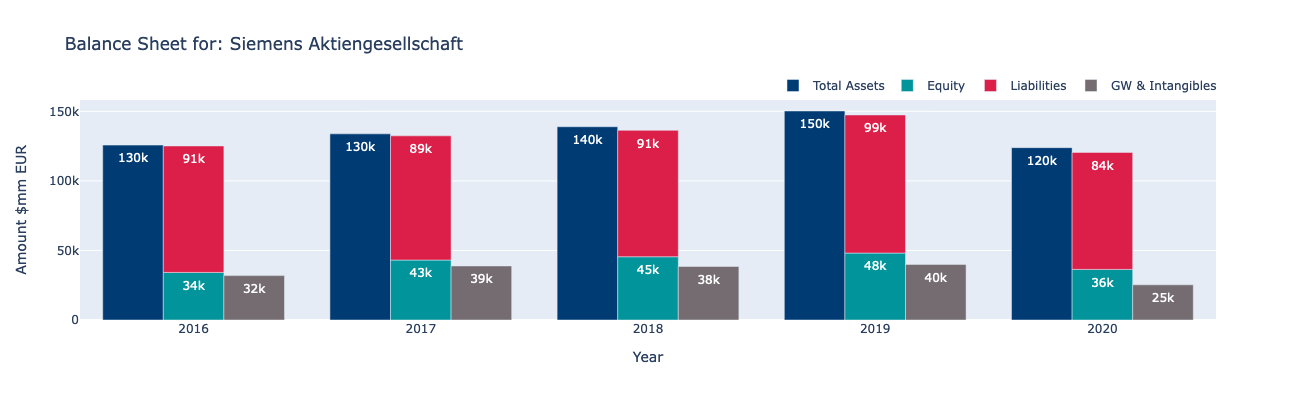

In [22]:
# [Graph] Balance Sheet total USD

fig = go.Figure(data=[
    go.Bar(name='Total Assets',
           x=graph_df["Date"],
           y=graph_df['Total Assets'],
           marker_color='#003B73',
           offsetgroup=0,
           ),
    go.Bar(name='Equity',
           x=graph_df["Date"],
           y=graph_df['SH Equity'],
           marker_color='#01949a',
           offsetgroup=1,
           ),
    go.Bar(name='Liabilities',
           x=graph_df["Date"],
           y=graph_df['Total Liab'],
           marker_color='#db1f48',
           offsetgroup=1,
           base=graph_df['SH Equity']
           ),
    go.Bar(name='GW & Intangibles',
           x=graph_df["Date"],
           y=graph_df['GW_&_IntAssets'],
           marker_color='#746C70',
           offsetgroup=2,
           )
    ])

fig.update_layout(barmode='group',  # group or stack
                  title=str('Balance Sheet for: '+company_name),
                  xaxis_title='Year',
                  yaxis_title=('Amount $mm '+company_currency),
                  legend=dict(orientation="h", yanchor="bottom", y=1.0, xanchor="right", x=1),
                  width=800, height=400)

fig.update_traces(texttemplate='%{y:.2s}', textposition='inside')

fig.show()

fig.write_image("images/output/bs.png", scale=2)

<a id="bs_percentage"></a>
### [Graph] Balance Sheet percentage amount [*](#index)

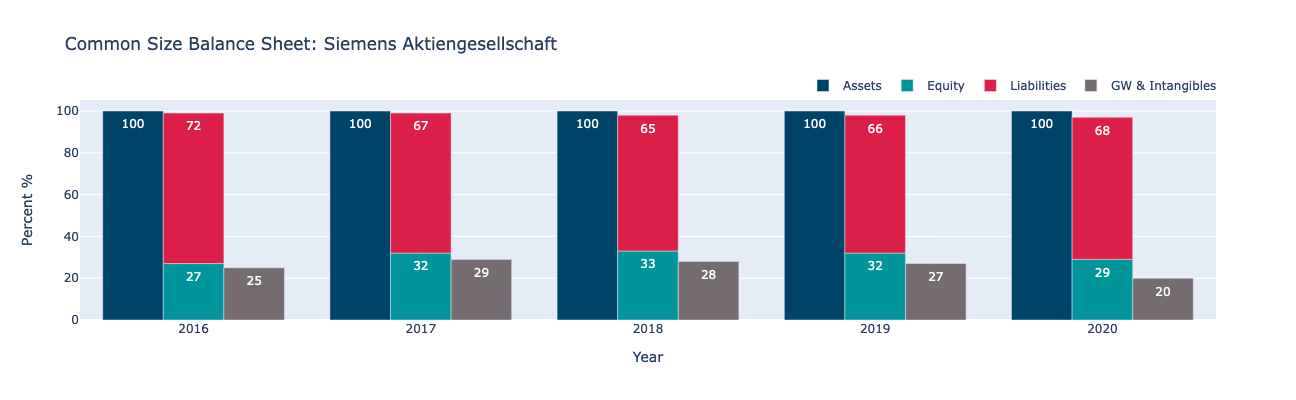

In [23]:
# [Graph] Balance Sheet percentage amount

fig = go.Figure(data=[
    go.Bar(name='Assets',
           x=graph_df["Date"],
           y=(graph_df['Total Assets']/graph_df['Total Assets'])*100,
           marker_color='#004369',
           offsetgroup=0,
           ),
    go.Bar(name='Equity',
           x=graph_df["Date"],
           y=graph_df['tot_equity_perc'],
           marker_color='#01949a',
           offsetgroup=1,
           ),
    go.Bar(name='Liabilities',
           x=graph_df["Date"],
           y=graph_df['tot_liability_perc'],
           marker_color='#db1f48',
           offsetgroup=1,
           base=graph_df['tot_equity_perc']
           ),
    go.Bar(name='GW & Intangibles',
           x=graph_df["Date"],
           y=graph_df['tot_intang_equity_perc'],
           marker_color='#746C70',
           offsetgroup=2
           )
    ])
fig.update_layout(barmode='group',  # group or stack
                  title=str('Common Size Balance Sheet: '+company_name),
                  xaxis_title='Year',
                  yaxis_title='Percent %',
                  legend=dict(orientation="h", yanchor="bottom", y=1.0, xanchor="right", x=1),
                  width=800, height=400)

fig.update_traces(texttemplate='%{y:.2s}', textposition='inside')

fig.show()

fig.write_image("images/output/cs_bs.png", scale=2)

<a id="is_total"></a>
### [Graph] Income Statement USD amount [*](#index)

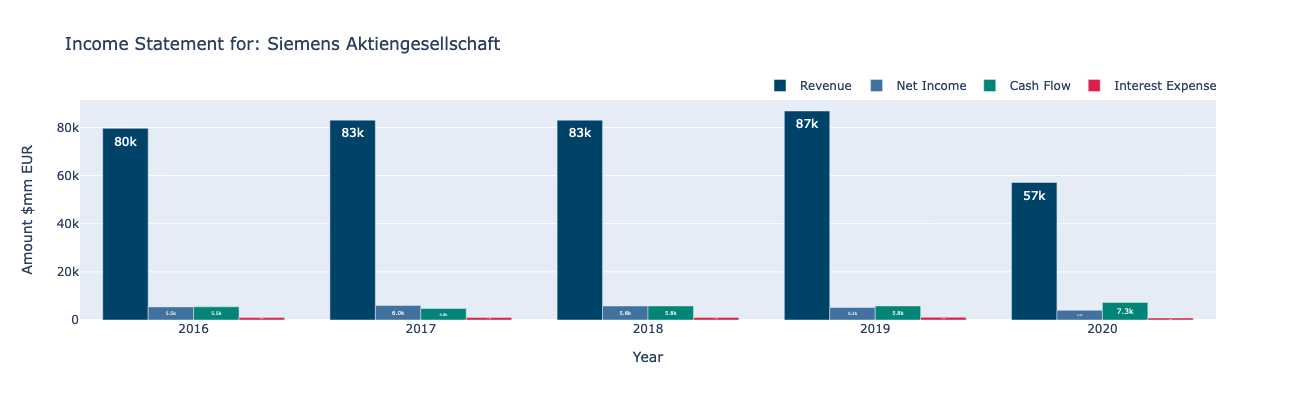

In [27]:
# [Graph] Income Statement USD amount graph

fig = go.Figure(data=[
    go.Bar(name='Revenue',
           x=graph_df["Date"],
           y=graph_df['Revenue'],
           marker_color='#004369'
           ),
    go.Bar(name='Net Income',
           x=graph_df["Date"],
           y=graph_df['Net Income'],
           marker_color='#41729f'
           ),
    go.Bar(name='Cash Flow',
           x=graph_df["Date"],
           y=graph_df['FCF'],
           marker_color='#028476'
           ),
    go.Bar(name='Interest Expense',
           x=graph_df["Date"],
           y=graph_df['Interest Expense'],
           marker_color='#DB1F48'
           )
    ])

fig.update_layout(barmode='group',  # group or stack
                  title=str('Income Statement for: '+company_name),
                  xaxis_title='Year',
                  yaxis_title=('Amount $mm '+company_currency),
                  legend=dict(orientation="h", yanchor="bottom", y=1.0, xanchor="right", x=1),
                  width=800, height=400)

fig.update_traces(texttemplate='%{y:.2s}', textposition='inside')

fig.show()

fig.write_image("images/output/is.png", scale=2)

<a id="is_percentage"></a>
### [Graph] Income Statement percentage amount [*](#index)


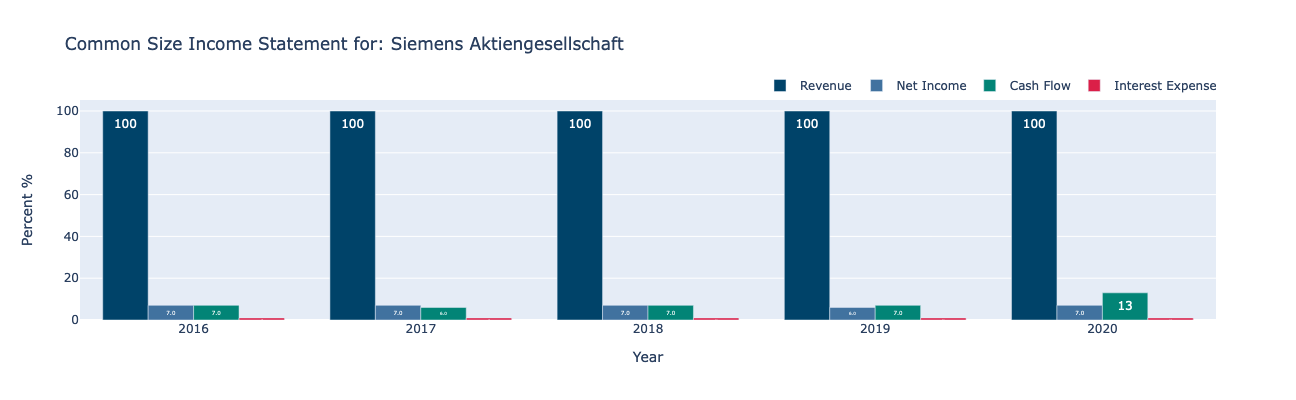

In [25]:
# [Graph] Income Statement percentage amount

fig = go.Figure(data=[
    go.Bar(name='Revenue', 
           x=graph_df["Date"], 
           y=graph_df['Revenue_perc'],
           marker_color='#004369'
          ),
    go.Bar(name='Net Income', 
           x=graph_df["Date"], 
           y=graph_df['Net_income_perc'], 
           marker_color='#41729f'
          ),
    go.Bar(name='Cash Flow', 
           x=graph_df["Date"], 
           y=graph_df['FCF_perc'],
           marker_color='#028476'           
          ), 
    go.Bar(name='Interest Expense',
           x=graph_df["Date"],
           y=graph_df['Int_exp_perc'],
           marker_color='#DB1F48'
           )
    ])

fig.update_layout(barmode='group', # group or stack
                  title = str('Common Size Income Statement for: '+company_name), 
                  xaxis_title = 'Year', 
                  yaxis_title = 'Percent %',
                  legend=dict(orientation="h", yanchor="bottom", y=1.0, xanchor="right", x=1),
                 width=800, height=400) 

fig.update_traces(texttemplate='%{y:.2s}', textposition='inside')

fig.show()

fig.write_image("images/output/cs_is.png", scale=2)

<a id="CF_graph"></a>
### Cash Flow Statement Graph [*](#index)

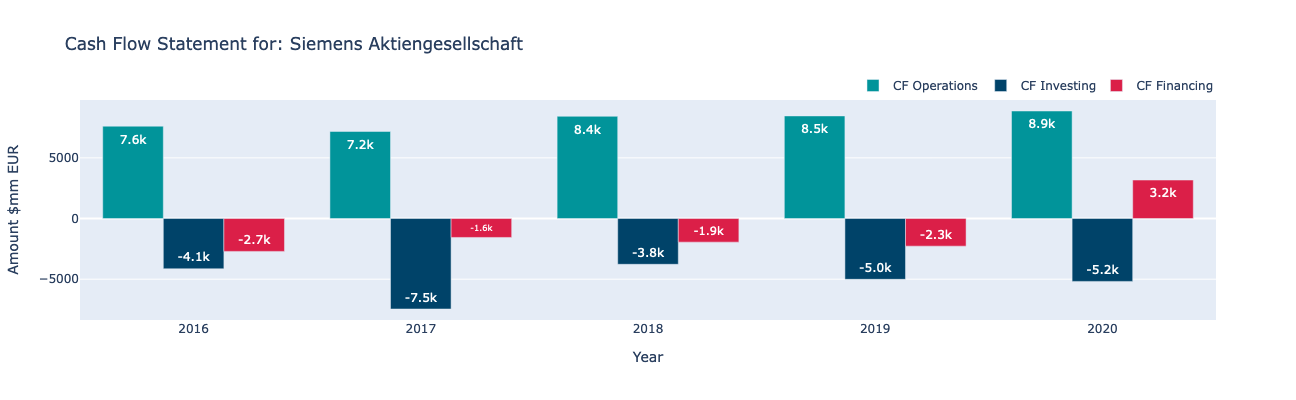

In [29]:
# Cash Flow Statment

fig = go.Figure(data=[
        go.Bar(name='CF Operations',
               x=graph_df["Date"],
               y=graph_df['CF Operations'],
               marker_color='#01949A',
               offsetgroup=2
               ),
        go.Bar(name='CF Investing',
               x=graph_df["Date"],
               y=graph_df['CF Investing'],
               marker_color='#004369',
               offsetgroup=3,
               ),
        go.Bar(name='CF Financing',
               x=graph_df["Date"],
               y=graph_df['CF Financing'],
               marker_color='#DB1F48',
               offsetgroup=4,
               )
    ])

fig.update_layout(barmode='group',  # group or stack
                  title=str('Cash Flow Statement for: '+company_name),
                  xaxis_title='Year',
                  yaxis_title=('Amount $mm '+company_currency),
                  legend=dict(orientation="h", yanchor="bottom", y=1.0, xanchor="right", x=1),
                  width=800, height=400)

fig.update_traces(texttemplate='%{y:.2s}', textposition='inside')

fig.show()

fig.write_image("images/output/cash_flow.png", scale=2)

<a id="equity_uses"></a>
### Equity distribution, reinvestment, and debt payment graph [*](#index)

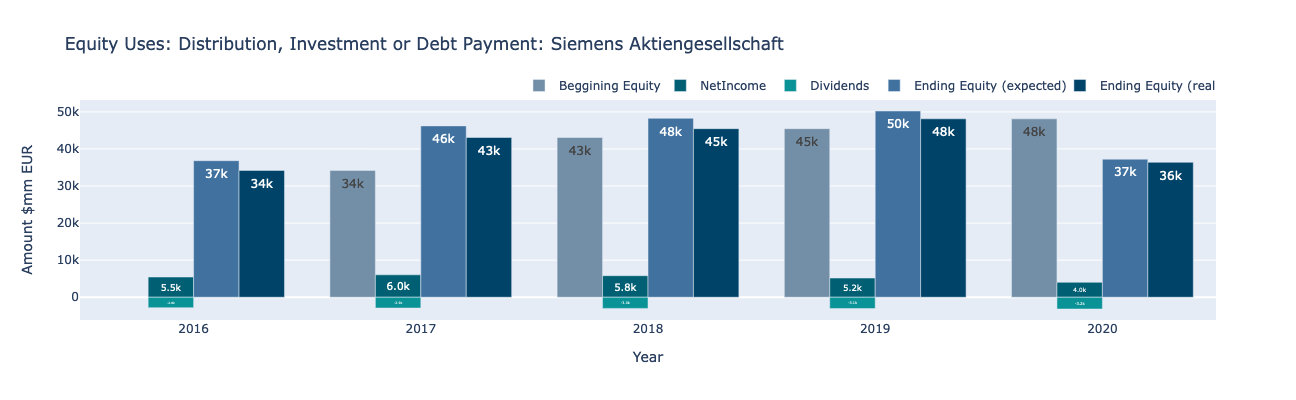

In [31]:
# Equity distribution, reinvestment, and debt payment graph

fig = go.Figure(data=[
        go.Bar(name='Beggining Equity',
           x=graph_df["Date"], 
           y=graph_df['LY_Equity'], 
           marker_color='#738fa7',
           offsetgroup=0
          ),
        go.Bar(name='NetIncome',
           x=graph_df["Date"], 
           y=graph_df['Net Income'], 
           marker_color='#005f73',
           offsetgroup=1,
          ),
        go.Bar(name='Dividends',
           x=graph_df["Date"], 
           y=graph_df['Dividends Paid'], 
           marker_color='#0a9396',
           offsetgroup=1,
          ),
        go.Bar(name='Ending Equity (expected)',
           x=graph_df["Date"], 
           y=graph_df['SH Equity']+graph_df['Net Income']+graph_df['Dividends Paid'],
           marker_color='#41729f',
           offsetgroup=2
          ),
        go.Bar(name='Ending Equity (real)',
           x=graph_df["Date"], 
           y=graph_df['SH Equity'],
           marker_color='#004369',
           offsetgroup=3
          )
    ])

fig.update_layout(barmode='group', # group or stack
                  title = str('Equity Uses: Distribution, Investment or Debt Payment: '+company_name), 
                  xaxis_title = 'Year', 
                  yaxis_title = ('Amount $mm '+company_currency),
                  legend=dict(orientation="h", yanchor="bottom", y=1.0, xanchor="right", x=1),
                  width=800, height=400)

fig.update_traces(texttemplate='%{y:.2s}', textposition='inside')

fig.show()

fig.write_image("images/output/equity_uses.png", scale=2)

In [32]:
# Check the values in the dataframe vs the graph
graph_df[["Date", "LY_Equity", "Net Income", "Dividends Paid", "SH Equity"]]

,Date,LY_Equity,Net Income,Dividends Paid,SH Equity
0,2016,NaN,5450.0,-2827.0,34211.0
1,2017,34211.0,6046.0,-2914.0,43089.0
2,2018,43089.0,5807.0,-3011.0,45474.0
3,2019,45474.0,5174.0,-3060.0,48125.0
4,2020,48125.0,4030.0,-3174.0,36390.0


<a id="pdf_table"></a>
### Creating a new dataframe for the PDF Table Output [*](#index)

We will use the fundamentals_financials_df to create financial statements.

We will create the following:
- Income Statement (Regular)
- Income Statement (Common Size)
- Balance Sheet (Regular)
- Balance Sheet (Common Size)
- Cash flow statement

We will save the output as a PNG file to add later to the PDF file

- Metrics
- Ratios

<a id="table_is_df"></a>
### [table_is_df] Income Statement Dataframe [*](#index)

In [33]:
fundamentals_financials_df

,WA ShsOut,WA ShsOutDil,Revenue,Gross Profit,R&D Expenses,Op Expenses,Op Income,Net Income,EPS,Interest Expense,Cash,Cur Assets,LT Assets,GW_&_IntAssets,Total Assets,Cur Liab,LT Liab,Total Liab,SH Equity,CF Operations,CF Investing,CF Financing,CAPEX,FCF,Dividends Paid,cashAtBeginningOfPeriod,cashAtEndOfPeriod
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020,806.335,817.364,57139.0,20186.0,4601.0,15632.0,4554.0,4030.0,5.00,815.0,16721.0,52968.0,70928.0,25288.0,123897.0,34117.0,49957.0,84074.0,36390.0,8862.0,-5184.0,3172.0,-1554.0,7308.0,-3174.0,12391.0,14041.0
2019,807.273,818.309,86849.0,25927.0,5670.0,19235.0,6692.0,5174.0,6.41,1129.0,14391.0,70370.0,79878.0,39960.0,150248.0,50723.0,48542.0,99265.0,48125.0,8456.0,-5011.0,-2277.0,-2610.0,5846.0,-3060.0,11066.0,12391.0
2018,815.063,828.316,83044.0,24863.0,5558.0,18951.0,5912.0,5807.0,7.12,1089.0,13551.0,64570.0,74345.0,38476.0,138915.0,47874.0,42994.0,90868.0,45474.0,8425.0,-3774.0,-1946.0,-2602.0,5823.0,-3011.0,8389.0,11066.0
2017,812.180,829.164,83049.0,25028.0,5164.0,17685.0,7343.0,6046.0,7.44,1051.0,10766.0,58429.0,75375.0,38834.0,133804.0,43394.0,45883.0,89277.0,43089.0,7176.0,-7457.0,-1560.0,-2406.0,4770.0,-2914.0,10618.0,8375.0
2016,808.686,819.914,79644.0,23818.0,4732.0,16677.0,7141.0,5450.0,6.74,989.0,13029.0,55329.0,70388.0,31901.0,125717.0,42916.0,47985.0,90901.0,34211.0,7611.0,-4144.0,-2710.0,-2135.0,5476.0,-2827.0,9958.0,10604.0


In [34]:
# Income Statement Dataframe
# Creating a new dataframe for the PDF Table Output

# Copy financials dataframe
table_is_df = fundamentals_financials_df.copy(deep=True)

# Drop non income statement variables
table_is_df.drop(['Cash', 'Cur Assets', 'LT Assets', 'GW_&_IntAssets',
                  'Total Assets', 'Cur Liab', 'LT Liab', 'Total Liab',
                  'SH Equity', 'CF Operations', 'CF Investing', 'CF Financing',
                  'CAPEX', 'FCF', 'Dividends Paid', 'cashAtBeginningOfPeriod',
                  'cashAtEndOfPeriod', 'WA ShsOut', 'WA ShsOutDil', 'EPS',
                  ], axis=1, inplace=True)

# Reorder Columns
table_is_df = table_is_df[['Revenue', 'Gross Profit','Op Expenses',
                           'Op Income', 'Net Income', 'R&D Expenses',
                           'Interest Expense']]

# Sort descending
table_is_df.sort_index(ascending=True, inplace=True)

# Copy dataframe to create common size income statement
table_cs_is_df = table_is_df.copy(deep=True)

# Format Columns: Remove decimals, include commas and turn into string.
is_columns = ['Revenue', 'Gross Profit', 'Op Expenses', 'Op Income',
              'Net Income', 'R&D Expenses', 'Interest Expense']

for column_name in is_columns:
    table_is_df[column_name] = pd.Series(["{0:,.0f}".format(val) for val in table_is_df[column_name]], index=table_is_df.index)

# Transpose the data
table_is_df = table_is_df.transpose()

# Save the data as an image:
table_is_df.dfi.export('images/output/is_table.png', table_conversion='matplotlib')

# Print table name
print("Income Statement")

# Show table
table_is_df


Income Statement


Date,2016,2017,2018,2019,2020
Revenue,"79,644","83,049","83,044","86,849","57,139"
Gross Profit,"23,818","25,028","24,863","25,927","20,186"
Op Expenses,"16,677","17,685","18,951","19,235","15,632"
Op Income,"7,141","7,343","5,912","6,692","4,554"
Net Income,"5,450","6,046","5,807","5,174","4,030"
R&D Expenses,"4,732","5,164","5,558","5,670","4,601"
Interest Expense,989,"1,051","1,089","1,129",815


<a id="table_cs_is_df"></a>
### [table_cs_is_df] Common Size Income Statement Dataframe [*](#index)

In [35]:
# Common Size Income Statement Dataframe
# Creating a new dataframe for the PDF Table Output

# Check initial data type
#print("Data type: "+str(table_cs_is_df.dtypes))

# Transform the values to Common Size (Percentage of Revenue)
# Revenue must be the last item on the list
cs_is_columns = ['Gross Profit', 'Op Expenses', 'Op Income', 'Net Income',
                 'R&D Expenses', 'Interest Expense', 'Revenue']

# Transform values to percentages
for column_name in cs_is_columns:
    table_cs_is_df[column_name] = round(((table_cs_is_df[column_name]/table_cs_is_df['Revenue'])*100), 0)

# Transform percentages to string and format to include % sybol.
for column_name in cs_is_columns:
    table_cs_is_df[column_name] = pd.Series(["{0:.0f}%".format(val) for val in table_cs_is_df[column_name]], index=table_cs_is_df.index)

# Check final data type
#print("Data type: "+str(table_cs_is_df.dtypes))

# Transpose the data
table_cs_is_df = table_cs_is_df.transpose()

# Save the data as an image:
table_cs_is_df.dfi.export('images/output/cs_is_table.png', table_conversion='matplotlib')

# Print table name
print("Common Size Income Statement")

table_cs_is_df

Common Size Income Statement


Date,2016,2017,2018,2019,2020
Revenue,100%,100%,100%,100%,100%
Gross Profit,30%,30%,30%,30%,35%
Op Expenses,21%,21%,23%,22%,27%
Op Income,9%,9%,7%,8%,8%
Net Income,7%,7%,7%,6%,7%
R&D Expenses,6%,6%,7%,7%,8%
Interest Expense,1%,1%,1%,1%,1%


<a id="table_bs_df"></a>
### [table_bs_df] Balance Sheet Dataframe [*](#index)

In [36]:
# Balance Sheet Dataframe
# Creating a new dataframe for the PDF Table Output

# Copy financials dataframe
table_bs_df = fundamentals_financials_df.copy(deep=True)


# Drop non balance sheet variables
table_bs_df.drop(['WA ShsOut', 'WA ShsOutDil', 'Revenue', 'Gross Profit', 'R&D Expenses',
                  'Op Expenses', 'Op Income', 'Net Income', 'EPS', 'CF Operations',
                  'CF Investing', 'CF Financing', 'CAPEX', 'FCF',  'Cash',
                  'Dividends Paid', 'cashAtBeginningOfPeriod', 'cashAtEndOfPeriod',
                  'GW_&_IntAssets','Interest Expense'
                  ], axis=1, inplace=True)

# Sort descending
table_bs_df.sort_index(ascending=True, inplace=True)

# Copy dataframe to create common size balance sheet
table_cs_bs_df = table_bs_df.copy(deep=True)

# Columns to format
bs_columns = ['Cur Assets', 'LT Assets','Total Assets',
              'Cur Liab', 'LT Liab', 'Total Liab', 
              'SH Equity']

# Format Columns: Remove decimals, include commas and turn into string.
for column_name in bs_columns:
    table_bs_df[column_name] = pd.Series(["{0:,.0f}".format(val) for val in table_bs_df[column_name]], index=table_bs_df.index)

# Transpose the data
table_bs_df = table_bs_df.transpose()

# Save the data as an image:
table_bs_df.dfi.export('images/output/bs_table.png', table_conversion='matplotlib')

# Print table name
print("Balance Sheet")

# Show table
table_bs_df


Balance Sheet


Date,2016,2017,2018,2019,2020
Cur Assets,"55,329","58,429","64,570","70,370","52,968"
LT Assets,"70,388","75,375","74,345","79,878","70,928"
Total Assets,"125,717","133,804","138,915","150,248","123,897"
Cur Liab,"42,916","43,394","47,874","50,723","34,117"
LT Liab,"47,985","45,883","42,994","48,542","49,957"
Total Liab,"90,901","89,277","90,868","99,265","84,074"
SH Equity,"34,211","43,089","45,474","48,125","36,390"


<a id="table_cs_bs_df"></a>
### [table_cs_bs_df] Common Size Balance Sheet Dataframe [*](#index)

In [37]:
# Common Size Balance Sheet Dataframe
# Creating a new dataframe for the PDF Table Output

# Check initial data type
#print("Data type: "+str(table_cs_bs_df.dtypes))

# Transform the values to Common Size (Percentage of Assets)
# Total Assets must be the last value in the list
cs_bs_columns = ['Cur Assets', 'LT Assets',
                 'Cur Liab', 'LT Liab', 'Total Liab',
                 'SH Equity', 'Total Assets']

# Transform values to percentages
for column_name in cs_bs_columns:
    table_cs_bs_df[column_name] = round(((table_cs_bs_df[column_name]/table_cs_bs_df['Total Assets'])*100), 0)


# Transform percentages to string and format as percentage
for column_name in cs_bs_columns:
    table_cs_bs_df[column_name] = pd.Series(["{0:.0f}%".format(val) for val in table_cs_bs_df[column_name]], index=table_cs_bs_df.index)


# Check final data type
#print("Data type: "+str(table_cs_is_df.dtypes))

# Transpose the data
table_cs_bs_df = table_cs_bs_df.transpose()

# Save the data as an image:
table_cs_bs_df.dfi.export('images/output/cs_bs_table.png', table_conversion='matplotlib')

# Print table name
print("Common Size Balance Sheet")
table_cs_bs_df

Common Size Balance Sheet


Date,2016,2017,2018,2019,2020
Cur Assets,44%,44%,46%,47%,43%
LT Assets,56%,56%,54%,53%,57%
Total Assets,100%,100%,100%,100%,100%
Cur Liab,34%,32%,34%,34%,28%
LT Liab,38%,34%,31%,32%,40%
Total Liab,72%,67%,65%,66%,68%
SH Equity,27%,32%,33%,32%,29%


<a id="table_cf_df"></a>
### [table_cf_df] Cash Flow Statement Dataframe [*](#index)

In [38]:
# Cash Flow Statement Dataframe
# Creating a new dataframe for the PDF Table Output

# Copy financials dataframe
table_cf_df = fundamentals_financials_df.copy(deep=True)


# Drop non cash flow statement variables
table_cf_df.drop(['WA ShsOut', 'WA ShsOutDil', 'Revenue', 'Gross Profit', 'R&D Expenses',
                  'Op Expenses', 'Op Income', 'Net Income', 'EPS', 'Cash',
                  'Cur Assets', 'LT Assets', 'GW_&_IntAssets',
                  'Total Assets', 'Cur Liab', 'LT Liab', 'Total Liab',
                  'SH Equity', 'Dividends Paid', 'CAPEX', 'FCF', 'Interest Expense'
                  ], axis=1, inplace=True)

# Add change in cash column
table_cf_df['Change in Cash'] = table_cf_df['cashAtEndOfPeriod'] - table_cf_df['cashAtBeginningOfPeriod']

# Sort descending
table_cf_df.sort_index(ascending=True, inplace=True)

# Copy dataframe for Common Size cashflow statement
table_cs_cf_df = table_cf_df.copy(deep=True)

# Columns to format
cf_columns = ['CF Operations', 'CF Investing', 'CF Financing',
              'cashAtBeginningOfPeriod', 'cashAtEndOfPeriod', 'Change in Cash']

# Format Columns: Remove decimals, include commas and turn into a string.
for column_name in cf_columns:
    table_cf_df[column_name] = pd.Series(["{0:,.0f}".format(val) for val in table_cf_df[column_name]], index=table_cf_df.index)

# Transpose the data
table_cf_df = table_cf_df.transpose()

# Save the data as an image:
table_cf_df.dfi.export('images/output/cf_table.png', table_conversion='matplotlib')

# Print table name
print("Cash Flow Statement")

# Show table
table_cf_df

Cash Flow Statement


Date,2016,2017,2018,2019,2020
CF Operations,"7,611","7,176","8,425","8,456","8,862"
CF Investing,"-4,144","-7,457","-3,774","-5,011","-5,184"
CF Financing,"-2,710","-1,560","-1,946","-2,277","3,172"
cashAtBeginningOfPeriod,"9,958","10,618","8,389","11,066","12,391"
cashAtEndOfPeriod,"10,604","8,375","11,066","12,391","14,041"
Change in Cash,646,"-2,243","2,677","1,325","1,650"


<a id="table_metrics_df"></a>
### [table_metrics_df] Metrics Dataframe [*](#index)

In [39]:
# Metrics Dataframe
# Creating a new dataframe for the PDF Table Output

# Filter the fundamentals_metrics_df
fundamentals_metrics_filtered_df = pd.DataFrame(fundamentals_metrics_df, columns=['Mkt Cap',
                                                                                  'Debt to Assets',
                                                                                  'Debt to Equity'])

# Filted the fundamentals_ratios_df
fundamentals_ratios_filtered_df = pd.DataFrame(fundamentals_ratios_df, columns=['Gross Profit Margin',
                                                                                'Op Margin',
                                                                                'Int Coverage',
                                                                                'Net Profit Margin',
                                                                                'Dividend Yield',
                                                                                'Current Ratio',
                                                                                'Operating Cycle',
                                                                                'Days of AP Outstanding',
                                                                                'Cash Conversion Cycle',
                                                                                'ROA',
                                                                                'ROE',
                                                                                'PE',
                                                                                'PS',
                                                                                'PB',
                                                                                'PCF',
                                                                                'EaringsYield'])

# Filted the fundamentals_financials_df
fundamentals_financials_filtered_df = pd.DataFrame(fundamentals_financials_df, columns=['WA ShsOut',
                                                                                        'WA ShsOutDil',
                                                                                        'EPS',
                                                                                        'CAPEX',
                                                                                        'FCF'])

# Concatenate the dataframes into a single dataframe
table_metrics_df = pd.concat([fundamentals_metrics_filtered_df,
                              fundamentals_ratios_filtered_df,
                              fundamentals_financials_filtered_df
                              ], axis=1)

# Substitute NaN values for float
table_metrics_df.fillna(.99, inplace=True)

# Convert all values to floats (in case there are empty string values)
table_metrics_df = table_metrics_df.astype(float)

# Sort descending
table_metrics_df.sort_index(ascending=True, inplace=True)

# Check data type
#print("Data type: "+str(table_metrics_df.dtypes))

# Columns to format
integer_columns = ['Mkt Cap', 'PE', 'PS', 'PB', 'PCF', 'Int Coverage', 'Operating Cycle', 'Days of AP Outstanding',
                   'Cash Conversion Cycle', 'WA ShsOut', 'WA ShsOutDil', 'EPS', 'CAPEX', 'FCF']

percentage_columns = ['Debt to Assets', 'Debt to Equity', 'Gross Profit Margin', 'Op Margin', 'Net Profit Margin',
                      'Dividend Yield', 'Current Ratio', 'ROA', 'ROE','EaringsYield' ]

# Format Columns: Remove decimals, include commas and turn into a string.
for column_name in integer_columns:
    table_metrics_df[column_name] = pd.Series(["{0:,.0f}".format(val) for val in table_metrics_df[column_name]], index=table_metrics_df.index)

for column_name in percentage_columns:
    table_metrics_df[column_name] = pd.Series(["{0:.0f}%".format(val*100) for val in table_metrics_df[column_name]], index=table_metrics_df.index)

# Re index columns to order numbers first and percentages second
table_metrics_df = table_metrics_df.reindex(columns=integer_columns+percentage_columns)

# Check datatypes
#print("Data type: "+str(table_metrics_df.dtypes))

# Transpose the data
table_metrics_df = table_metrics_df.transpose()

# Save the data as an image:
table_metrics_df.dfi.export('images/output/main_metrics_table.png', table_conversion='matplotlib')

# Print Table Name
print("Main Metrics")

# Show table
table_metrics_df

Main Metrics


Date,2016,2017,2018,2019,2020
Mkt Cap,"83,739","99,492","81,620","84,489","81,198"
PE,15,16,14,16,20
PS,1,1,1,1,1
PB,2,2,2,2,2
PCF,15,21,14,14,11
Int Coverage,7,7,5,6,6
Operating Cycle,131,139,82,83,71
Days of AP Outstanding,53,61,67,68,78
Cash Conversion Cycle,79,78,15,15,-7
WA ShsOut,809,812,815,807,806


In [40]:
#### Otras funciones que use anteriormente  y que tal ves use despues####

# Transform the DataFrame to include index of Date
#table = table.reset_index()

# Fill NA values as zeroes in table
#table_df['Dividend Yield'].fillna(0,inplace=True)

# Transform Date to string
#table['Date'] = table['Date'].astype(str)

# Transform the DataFrame to include index of Date
#table = table.reset_index()

#output.to_csv('temp.csv', index = True)


<a id="export_pdf"></a>
### Exporting as a PDF file[*](#index)

In [41]:
# Export to PDF

# Border changes for editing
border_chg = 0 # 1 = show, 0 = hide

In [42]:
# FPDF Notes:

# self.cel(ln=Position after call = 0=Right, 1=NextLine, 2=Below)
# self.cel(w=0) # Uses all available space
# fpdf.image(name, x = possition, y = possition, w = 0, h = 0, type = '', link = '')
# If no w or h is provided, its calculated automatically.

<a id="formating_pdf"></a>
#### Formating data for the PDF [*](#index)
[PDF section start](#export_pdf)

In [43]:
# Formating PDF Data

# Get variable values
today = dt.date.today()
company_symbol = profile_df.at[0, 'symbol']
company_name = profile_df.at[0, 'companyName']
company_description = Profile[0]['description']
currency = Profile[0]['currency']
isin = Profile[0]['isin']
cusip = Profile[0]['cusip']
exchange = Profile[0]['exchangeShortName']
industry = Profile[0]['industry']
website = Profile[0]['website']
sector = Profile[0]['sector']
country = Profile[0]['country']
employees = Profile[0]['fullTimeEmployees']
company_image = Profile[0]['image']
ipo_date = Profile[0]['ipoDate']
ceo = Profile[0]['ceo']

# Change employee number format
employees = float(employees)
employees = ('{:,.0f}'.format(employees))

# Create a tuple from the values
data = (
    ("Company Name:", company_name),
    ("Company Symbol:", company_symbol),
    ("Currency:", currency),
    ("ISIN:", isin,),
    ("CUSIP:", cusip),
    ("Exchange:", exchange),
    ("Industry:", industry),
    ("Sector:", sector),
    ("Country:", country),
    ("No. Employees:", employees),
    ("IPO Date:", ipo_date),
    ("CEO:", ceo)
    )

<a id="defining_classes_pdf"></a>
#### Defining Classes [*](#index)
[PDF section start](#export_pdf)

In [44]:
# Defining Classes

class PDF(FPDF):
    def header(self):
        # Logo
        self.image('images/input/BS-Logo.png', x=12, y=12, w=30)
        # Analysis date
        self.ln(4)
        self.cell(155)
        self.set_font('Helvetica', 'BI', 8)
        self.cell(w=35, h=5,
                  txt="Created : "+today.strftime("%d-%b-%Y"),
                  border=border_chg, ln=0, align='R', fill=False, link='')
        self.ln(4)
        # Company Name
        self.ln(12)
        self.cell(55)
        self.set_font('Helvetica', 'B', 12)
        self.cell(w=100, h=5,
                  txt=(" Company Analysis: "+company_name),
                  border=border_chg, ln=1, align='C')

    def footer(self):
        # Position at 1.5 cm from bottom
        self.set_y(-20)
        # Information Disclaimer
        self.set_font('Helvetica', 'I', 8)
        self.cell(w=0, h=4,
                  txt='*Data provided by Financial Modeling Prep',
                  border=border_chg, ln=1, align='R')
        self.ln(1)
        # Page number
        self.set_font('Helvetica', 'BI', 10)
        self.cell(w=0, h=5,
                  txt='Page ' + str(self.page_no()) + ' of {nb}',
                  border=border_chg, ln=0, align='C')

<a id="class_instantiation_pdf"></a>
#### Instantiation of Class [*](#index)
[PDF section start](#export_pdf)

In [45]:
# Instantiation of Class
pdf = PDF(orientation="P", unit="mm", format="Letter")

# Document Description
pdf.set_author(author="Pablo Cruz Lemini")
pdf.set_subject(subject="Fundamental Analyisis for "+company_symbol)
pdf.set_keywords("fundamental, analysis,"+company_symbol)

# Add unicode font
pdf.add_font("FreeSans", "", "/Users/portfedh/Library/Fonts/freefont-20120503/FreeSans.ttf", uni=True)
pdf.add_font("FreeSans", "B", "/Users/portfedh/Library/Fonts/freefont-20120503/FreeSansBold.ttf", uni=True)
pdf.set_font('FreeSans', 'B', 11)

<a id="page1_pdf"></a>
#### Page 1: Company Description [*](#index)
[PDF section start](#export_pdf)

In [46]:
# Page 1
pdf.add_page()

# Title
pdf.ln(10)
pdf.cell(14)
pdf.set_font('Helvetica', 'B', 11)
pdf.cell(w=50, h=5, txt="Company Summary:", border=border_chg, ln=1, align='L')
pdf.ln(3)

# Company summary table
pdf.set_font("FreeSans", size=8)
line_height = pdf.font_size * 2
col_width = pdf.epw / 5  # distribute content evenly
for row in data:
    pdf.cell(20)
    for datum in row:
        pdf.multi_cell(col_width, line_height, datum, border=border_chg, ln=3, max_line_height=pdf.font_size)
    pdf.ln(line_height)
pdf.ln(5)

# Company description
pdf.cell(14)
pdf.multi_cell(w=165, h=5,
               txt=company_description,
               border=border_chg,
               align='J',
               fill=False)

# Company image
try:
    pdf.image('images/output/company_image.png', x=100, y=215, h=15)
except Exception:
    pass

<a id="page2_pdf"></a>
#### Page 2: Company Metrics [*](#index)
[PDF section start](#export_pdf)

In [47]:
# Page 2
pdf.add_page()

# Title
pdf.set_font('Helvetica', 'B', 11)
pdf.ln(10)
pdf.cell(w=45, h=5, txt=" Financial Summary:",
         border=border_chg, ln=1, align='L')

# Amount in Millions
pdf.cell(10)
pdf.set_font('Helvetica', 'I', 8)
pdf.cell(w=40, h=5, txt="Amounts in $ "+company_currency+" (Millions)",
         border=border_chg, ln=0, align='L', fill=False, link='')

# Main metrics table
pdf.image('images/output/main_metrics_table.png', x=40, y=62, h=150)


{'data': b'x\x9c\xec\xbdw\x9c\xd5\xc4\xe3\xfd}awa\x97\xb2tv\xe9U\xa9J\x07\x0b\xd2\xa4\x834\x01\x11\xe9M\x10\xac\xd8P\xa4\x08\x88"\x8a"\xd8\x15\x15\x04\x0bb\xc3JQ>4\x11T,\x08\xd2{G\xea\xfd{\x9f\xf3\xddy6\xbf\x982\xc9\xed7\x99\xf3\xfec_\xc9d2\x993\xed\xcc\xa4\xdc\r\xe4\x10B\x08!D\x19\x02\x89\xce\x00!\x84\x10B\xe2\x07\x8d\x9f\x10B\x08Q\x08\x1a?!\x84\x10\xa2\x104~B\x08!D!h\xfc\x84\x10B\x88B\xd0\xf8\t!\x84\x10\x85\xa0\xf1\x13B\x08!\nA\xe3\'\x84\x10B\x14\x82\xc6O\x08!\x84(\x04\x8d\x9f$\x05\x01)\x89\xce]L\x90+uY\x08\x92\xa3I[\x92\xb1\x16\x9e\xb4\xc4\xbf\xc6c\xa5$D(<<\xe1\xf2\xd3\xdd\xa4`\x9b\xb1\x08\x85\x11\x12\x15,\x9bx8\r:\xc9z\xbe\x1dr\xa5\xee\x0b!\xa4!#\x19\x8a%\xa6\xc2%\x89\'\\{L\x85\x87\x94B\x9c\xa1\xf0\xf0\x84G\x1eA\x96\xb7\xa8\xab%$\x0c\xdc\xf4\xeaH\xd2I6$\xdd\xd8|\xd4\\\x08\x8e\xbd\xdd1\x85D\x11S\xe1\xe6\xa3\n\n\xb7\xbb\\\xa2\xa0p\xcb\x10\xf7\xc2C\x8d\xe0*o\xd1\x10HH\xa4HZmh\r:i\xba\xbd\x1c\xf9\x10&\x1f2,#[&\xe5\x18\x18\x7fb*\xdc\xeer\xbe\x17\xael\x8d\xfbU\xb8\xa3\xae\x08\x85\'\xfb\x

<a id="page3_pdf"></a>
#### Page 3: Financial Statements [*](#index)
[PDF section start](#export_pdf)

In [48]:
# Page 3
pdf.add_page()

# Title
pdf.set_font('Helvetica', 'B', 11)
pdf.ln(10)
pdf.cell(w=45, h=5, txt=" Financial statements:",
         border=border_chg, ln=1, align='L')

# Amount in Millions
pdf.cell(10)
pdf.set_font('Helvetica', 'I', 8)
pdf.cell(w=40, h=5, txt="Amounts in $ "+company_currency+" (Millions)",
         border=border_chg, ln=0, align='L', fill=False, link='')

# Income Statement Title
pdf.ln(15)
pdf.cell(10)
pdf.set_font('Helvetica', 'B', 8)
pdf.cell(w=30, h=5, txt="Income Statement",
         border=border_chg, ln=0, align='L', fill=False, link='')

# Balance Sheet Title
pdf.ln(50)
pdf.cell(10)
pdf.set_font('Helvetica', 'B', 8)
pdf.cell(w=25, h=5, txt="Balance Sheet",
         border=border_chg, ln=0, align='L', fill=False, link='')

# Cash Flow Statement Title
pdf.ln(70)
pdf.cell(10)
pdf.set_font('Helvetica', 'B', 8)
pdf.cell(w=35, h=5, txt="Cash Flow Statement",
         border=border_chg, ln=0, align='L', fill=False, link='')

# Income Statement image
pdf.image('images/output/is_table.png', x=13, y=70, h=40)

# Common Size Income Statement
pdf.image('images/output/cs_is_table.png', x=120, y=70, h=40)

# Balance Sheet
pdf.image('images/output/bs_table.png', x=13, y=120, h=45)

# Common Size Balance Sheet
pdf.image('images/output/cs_bs_table.png', x=120, y=120, h=45)

# Cash Flow Statement
pdf.image('images/output/cf_table.png', x=45, y=190, h=40)


{'data': b'x\x9c\xed\x9dy\xfc\x0e\xd5\xfb\xff\xef\xca\x9e}\x17\n\t\x85\xec\xb4}\x08)J\x8a\xa2\x08\xa9\xa8\xb4\xdb\x8a\xd2BJ\xa8TJ\xfb\xa6}\xd3\xaa\x14m\x9f\x16\xdaI\xa5\x8d\xa2D\x94\x94\xee\xbf\xfd^\x9f\xf7\xf5s\xbe\xc7\xcc\x9c3g\xe6^\xe6~\xbb_\xcf?<\xde\xf7\x99k\xce\\\xd7Y_g\xe6\xccH\xed \x84\x10B\x081\x90J\xda\x01B\x08!\x84\x14.\x14\n\x84\x10B\x081B\xa1@\x08!\x84\x10#\x14\n\x84\x10B\x081B\xa1@\x08!\x84\x10#\x14\n\x84\x10B\x081B\xa1@\x08!\x84\x10#\x14\n\x84\x10B\x081B\xa1@\x08!\x84\x10#\x14\n\xa4T\x92\xb2\x92\xb4w\xb9\xc2\x1e\xacc9X\x8e\x16la\xe6:\xf0\x82%\xff5\x9e\xabH\xa2P\x9cQ\x0b\x19\xc6n?\xdd%\x87`\xaf2\x0f\x8c\x90\xfc\x13\xd8\x1fb\xf4\xfc\x02\x1c)L\xd8\x83u/\x87HCL!\x94LN\x03\xb7d\x9ex\xec9\r<R\x0e\xf9\xa48\xa3\x162\x8c=s\x03\xa3c\xb9\x88\x96\x90\\\xe32\nd\x92O\x01b\xe9\xf6\xfe\xa3\xfer\x08\x1d\x1dBsH\x8a\x9c\x06\xee?Z\x84\x81\x9b.\x97\x08\xc5\x19\xb5\x90\xad\xd8\xa3\x1a\x84;\x96\xa5\x00\t\xc9+\x96&\x1e\xa9\xe7\x17\xd40a\xc7>\xea\xd9\x87\x98@\xe3\xc0\xacB\x13\xf3ON\x037]n\xb7\x0

<a id="page4_pdf"></a>
#### Page 4: Financial Statement Graphs [*](#index)
[PDF section start](#export_pdf)

In [49]:
# Page 4
pdf.add_page()

# Income Statement Graph
pdf.image('images/output/is.png', x=30, y=35, h=80)

# Balance Sheet Graph
pdf.image('images/output/bs.png', x=30, y=105, h=80)

# Cash Flow Statement Graph
pdf.image('images/output/cash_flow.png', x=30, y=175, h=80)


{'data': b'x\x9c\xec\xbd\x0bl\x15W\x9a\xef;\x93Q\xd4\xa3\xd6\xa8G\xad\xee\xb9\xa3\xa3\xb9\xba\xb7\xcfh4\x1aY\xad\xd1\xb9J\xeb^\x8d\xa6G\xa3\xccm\xf5\xe9\xee\xa3\xa8\xa3\x93>=\x99IN\xb7r\xbb\x93t\x12zB&\t\x19\x92tH8\x10H \x904o\xb01\x10^\xe6\xe1\x00\xe6\xe9`\x0c\x0e\x0f\x13\xb0\x01\x1b\x1b\x03\xc6`\xb0\x8d\x8d\xdf\xef\xb7\xf7\xfd\xf0\n\x8bE\xd5\xae\xda\xb5\xb7\xf7\xdeU{\xef\xdfO\x7fE\xa4\xf6\xaa\xdak\xaf\xfaj\xd5\xfa\xfe^\xb5\xea\x0fB\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\xe6\x0f\xfc\xae\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\x1b\x18X\x00\x00\x00\x00\x00\x00\x00\x00\x10h0\xb0\x00\x00\x00\x00\x00\x00\x00\x00 \xd0``\x01\x00\x00\x00\x00\x00\x00\x00@\xa0\xc1\xc0\x02\x00\x00\x00\x00\x00\x00\x00\x80@\x83\x81\x05\x00\x00\x00\x00\x00\x00\x00\x00\x81\x06\x03\x0b\x00\x00\x00\x00\x00\x00\x00\x00\x02\r\x06\x16\x00\x00\x00\x00\x00\x00\x00\x00\x04\x1a\x0c,\x00\x00\x00\x00\x00\x00\x00\x00\x084\x18X\x00\x00\x00\x00\x00\x00\x00\x00\x10h0\xb0\x00\x00\x00\x00\x00\x00\x00\x00 \xd0``\x01\x00\x00\x00\x00\

<a id="page5_pdf"></a>
#### Page 5: Common Size Financial Statement Graphs [*](#index)
[PDF section start](#export_pdf)

In [50]:
# Page 5
pdf.add_page()

# Common Size Income Statement Graph
pdf.image('images/output/cs_is.png', x=30, y=35, h=80)

# Common Size Balance Sheet Graph
pdf.image('images/output/cs_bs.png', x=30, y=105, h=80)

# Common Size Cash Flow Statement Graph
pdf.image('images/output/equity_uses.png', x=30, y=175, h=80)


{'data': b'x\x9c\xec\xbd\xe9o\x15G\xda\xff}\xbf~\xfe\x94\xf3z^\x8et?\xa3\x9f4\x9ay\x11M\xa4\xb9\x7fQ\xa4\x8c\x12\xa1L\xd6I\x94p\x93\xc0C !A\x10H \x10\x06\x08K ,a\tk\xd8\x07\x88\x8d\xc1a1\x18;`0\x180\x06\x831\x18\xb3\x18\xe3};\xcf7\xbe\xec\x8b\xa2\xaa\xbbO\x9f\xee\xb3\xda\xdf\x8fJ\x08\xf7\xe9\xa5\xba\xf6\xeb\xdbUW\xfdW\x92\x10B\x08!\x84\x10B\x08!\x84\x90\x02\xe6\xbf\xf2\x1d\x01B\x08!\x84\x10B\x08!\x84\x10B\x82\xa0\x80E\x08!\x84\x10B\x08!\x84\x10B\n\x1a\nX\x84\x10B\x08!\x84\x10B\x08!\xa4\xa0\xa1\x80E\x08!\x84\x10B\x08!\x84\x10B\n\x1a\nX\x84\x10B\x08!\x84\x10B\x08!\xa4\xa0\xa1\x80E\x08!\x84\x10B\x08!\x84\x10B\n\x1a\nX\x84\x10B\x08!\x84\x10B\x08!\xa4\xa0\xa1\x80E\x08!\x84\x10B\x08!\x84\x10B\n\x1a\nX\x84\x10B\x08!\x84\x10B\x08!\xa4\xa0\xa1\x80E\x08!\x84\x10B\x08!\x84\x10B\n\x1a\nX\x84\x10B\x08!\x84\x10B\x08!\xa4\xa0\xa1\x80E\x08!\x84\x10B\x08!\x84\x10B\n\x1a\nX\x84\x10B\x08!\x84\x10B\x08!\xa4\xa0\xa1\x80E\x08!\x84\x10B\x08!\x84\x10B\n\x1a\nX\x84\x10B\x08!\x84\x10B\x08!\xa4\xa0\xa1\x80E\x08!

<a id="save_output_pdf"></a>
#### Save Output as PDF [*](#index)
[PDF section start](#export_pdf)

In [51]:
# Save output as PDF
pdf.output('files/'+company_symbol + " " + today.strftime("%Y-%m-%d") + ".pdf")

[Go to Ticker](#ticker)

[PDF section start](#export_pdf)